# Logistic Regression 
## on Titanic.csv data set 
### https://www.kaggle.com/c/titanic/data?select=train.csv
### Collection-> Analysis-> Wrangling -> train& test split -> accuracy check

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

In [2]:
data=pd.read_csv(r"C:\Users\yash gandhi\Desktop\Python\TitanicTrain.csv",sep=",")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print("Total passengers: " + str(len(data)) )

Total passengers: 891


## Analysis data

<AxesSubplot:xlabel='Survived', ylabel='count'>

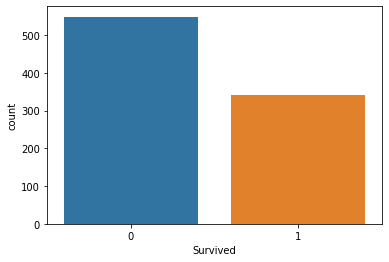

In [4]:
#survival
sns.countplot(x="Survived",data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

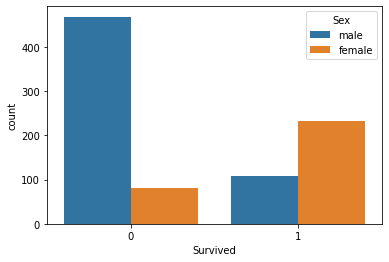

In [5]:
#gender
sns.countplot(x="Survived",hue="Sex",data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

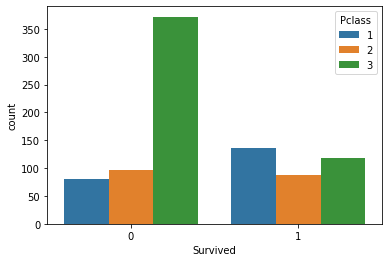

In [6]:
#passenger class
sns.countplot(x="Survived",hue="Pclass",data=data)

<AxesSubplot:ylabel='Frequency'>

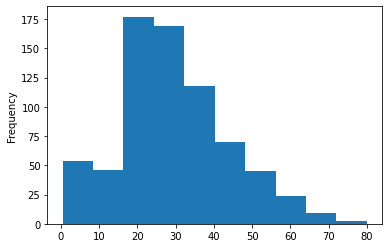

In [7]:
data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

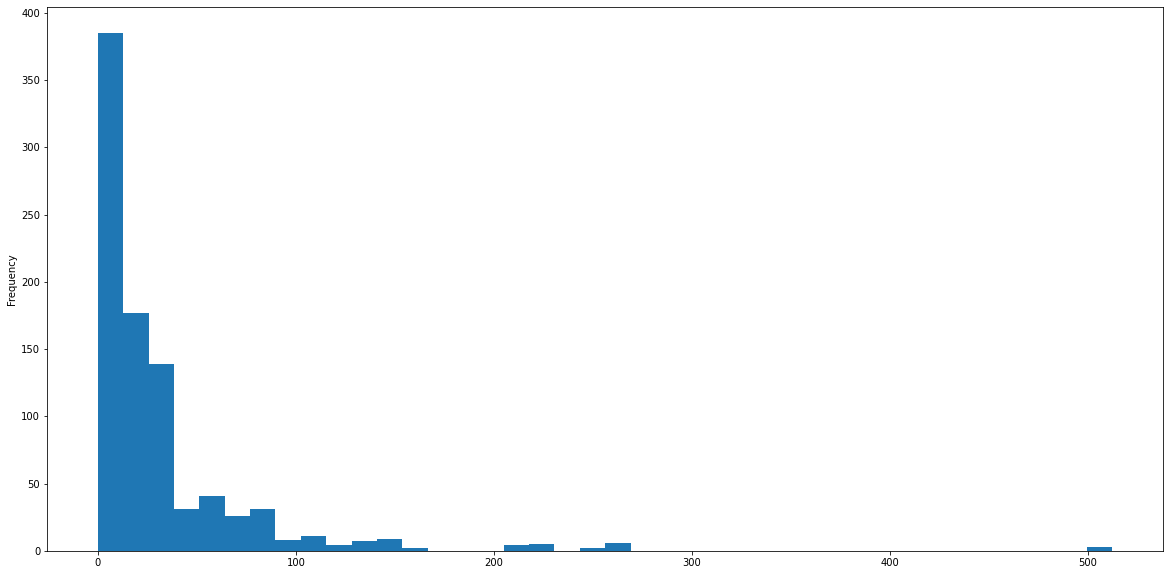

In [8]:
data["Fare"].plot.hist(bins=40,figsize=(20,10))

<AxesSubplot:ylabel='Frequency'>

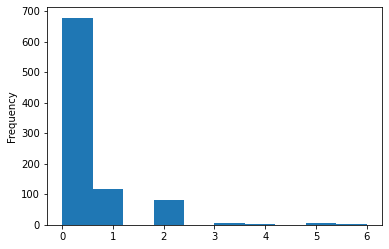

In [9]:
data["Parch"].plot.hist()

<AxesSubplot:xlabel='Parch', ylabel='count'>

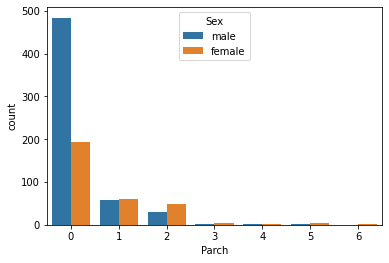

In [10]:
sns.countplot(x="Parch",hue="Sex",data=data)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

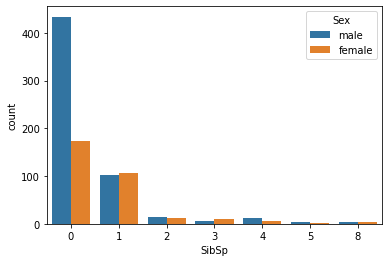

In [12]:
sns.countplot(x="SibSp",hue="Sex",data=data)

<AxesSubplot:xlabel='Fare', ylabel='count'>

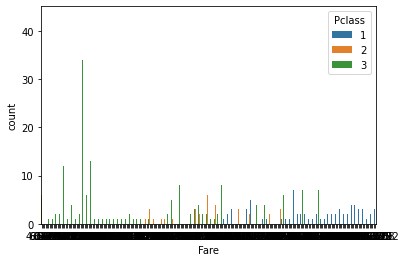

In [13]:
sns.countplot(x="Fare",hue="Pclass",data=data)

## Data Wrangling
### Cleaning of unnecessary data

In [14]:
#info of the missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

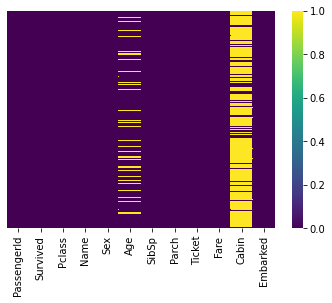

In [15]:
#heatmap for missing values
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

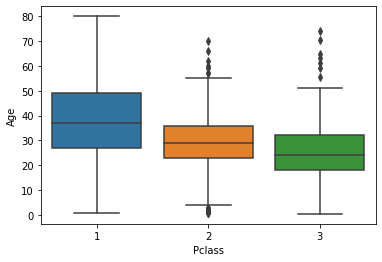

In [16]:
sns.boxplot(x="Pclass",y="Age",data=data)

In [17]:
#removing column which was redundant
data.head(10)
data.drop("Cabin",axis=True,inplace=True)

In [18]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [19]:
#info of the missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [20]:
#dropping all null values which are present
data.dropna(inplace=True)

<AxesSubplot:>

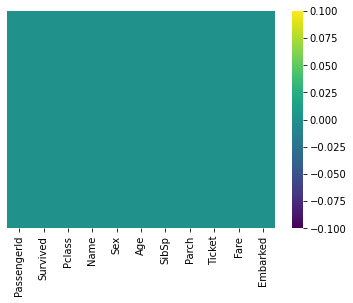

In [21]:
#heatmap for missing values after data wrangling
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [22]:
#now as LR won't take the sring values of address or the gender, so convert it into binary data by using dummy variable
Sex=pd.get_dummies(data["Sex"],drop_first=True)
Embarked=pd.get_dummies(data["Embarked"],drop_first=True)
Pclass=pd.get_dummies(data["Pclass"],drop_first=True)

In [23]:
#now concatenate the three variables in our dataset
data=pd.concat([data,Sex,Embarked,Pclass],axis=1)

In [24]:
#dropping the unnecessary variables
data.drop(["Sex", "Embarked", "Pclass","Name","Ticket"], axis=1,inplace=True)
data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


## Train and test split and prediction using LR

In [25]:
X=data.drop("Survived",axis=1)   #if we used inplace=true then the modification should be done in the original dataset
Y=data["Survived"]

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=6)

In [26]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression()
logModel.fit(x_train, y_train)
prediction=logModel.predict(x_test)

C:\Users\yash gandhi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
from sklearn.metrics import classification_report
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.79      0.83      0.81       128\n           1       0.72      0.66      0.69        86\n\n    accuracy                           0.76       214\n   macro avg       0.75      0.75      0.75       214\nweighted avg       0.76      0.76      0.76       214\n'

## Accuracy check

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[106,  22],
       [ 29,  57]], dtype=int64)

In [29]:
#printing the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.7616822429906542